<h1 style="color:#a22ea2;">Veri Bilimi ve Makine Ögrenmesi Projesi</h1> 

 ## İçindekiler

* [Gerekli kütüphaneleri eklenmesi]
* [Keşifçi Veri Analizi]  
* [Veri Ön İşleme] 
* [Naive Bayes Algoritması](   
* [Decision Tree Algoritması]
* [K Nearest Neighbor (K En Yakın Komşu) Algoritması]

Bir alışveriş merkezinde teknolojik ürünler satan mağazaya ait tablet ürünlerinin
özellikleri ve fiyatları “tablet.csv” olarak sizlerle paylaşılmıştır. Mağaza müdürü vitrinlerinde
tablet ürünlerini en doğru şekilde sergileyebilmek için 2.000 adet tableti fiyat/performans
durumlarına göre “Ucuz”, “Normal”, “Pahalı”, “Çok Ucuz” olarak etiketlemiştir.



Mağazasına yeni gelecek tablet ürünlerini etiketleyerek vakit kaybetmek istemeyen IT
ekibi mevcut verilerle başarılı bir makine öğrenmesi algoritması geliştirmek istemektedir.
Böylelikle yeni gelecek tablet ürünlerini hangi vitrinde sergilemeleri gerektiğini hızlı ve
güvenilir şekilde elde edebileceklerdir. IT ekip lideri bu projeyi keşifçi veri analizi, ön işleme
ve tahmine dayalı analitik makine öğrenmesi olmak üzere 3 safha olarak planlamaktadır. 



![](https://www.btelligent.com/fileadmin/_processed_/7/0/csm_data-science-ansatz_ddef991d7d.jpg)

<h2 >Gerekli kütüphaneleri ekliyoruz</h2>

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, recall_score, f1_score, precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from warnings import filterwarnings
from sklearn import ensemble
from sklearn.metrics import confusion_matrix as cm

filterwarnings('ignore')
from matplotlib.legend_handler import HandlerLine2D
from sklearn.tree import DecisionTreeClassifier
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix

Dizinde bulunan veri çerçevemizi tablet değişkenine atayalım. tablet değişkenini df değişkenine kopyalayarak kullanmaya başlayalım.

In [2]:
tablet = pd.read_csv('../input/tabletdataset/tablet.csv')
df = tablet.copy()
df

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,Yok,2.9,Var,3.0,Var,7,0.8,147,2,6,487,722,1241.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1996,1654,Yok,1.8,Yok,1.0,Yok,11,0.3,146,7,2,1184,1719,1070.0,14,Var,Var,Var,Ucuz,Sarı
1997,742,Yok,2.2,Var,4.0,Yok,56,0.2,190,7,14,577,1359,3557.0,12,Yok,Var,Var,Pahalı,Turuncu
1998,704,Yok,2.2,Var,4.0,Yok,53,0.2,186,6,6,251,1013,3653.0,15,Var,Var,Var,Normal,Turkuaz


<h2  style="color:#00BFFF">Keşifçi Veri Analizi(EDA)</h2> 

In [3]:
df.shape
#2000 gözlem ve 20 adet öznitelikten oluşan bir datamız var

(2000, 20)

In [4]:
df.head()

# veri cercevesinin ilk 5 gozlemini goruntuleyelim.

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz


In [5]:
df.tail()
# veri cercevesinin son 5 gozlemini goruntuleyelim.

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
1995,689,Yok,2.9,Var,3.0,Var,7,0.8,147,2,6,487,722,1241.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1996,1654,Yok,1.8,Yok,1.0,Yok,11,0.3,146,7,2,1184,1719,1070.0,14,Var,Var,Var,Ucuz,Sarı
1997,742,Yok,2.2,Var,4.0,Yok,56,0.2,190,7,14,577,1359,3557.0,12,Yok,Var,Var,Pahalı,Turuncu
1998,704,Yok,2.2,Var,4.0,Yok,53,0.2,186,6,6,251,1013,3653.0,15,Var,Var,Var,Normal,Turkuaz
1999,1872,Yok,0.5,Yok,5.0,Var,26,0.5,172,4,10,672,1088,2273.0,8,Var,Yok,Var,Normal,Siyah


In [6]:
df.sample(5)
# veri cercevemizin rastgele 5 gozlemini goruntuluyoruz.

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
1264,1864,Yok,2.2,Yok,0.0,Var,7,0.1,142,1,2,225,1545,2258.0,10,Var,Yok,Yok,Normal,Kırmızı
858,741,Yok,1.5,Yok,1.0,Yok,14,0.3,178,5,13,334,594,1886.0,9,Var,Var,Var,Çok Ucuz,Beyaz
21,600,Var,1.8,Yok,9.0,Var,6,0.8,199,2,15,486,1032,3495.0,7,Var,Var,Yok,Normal,Kırmızı
1635,1177,Yok,0.9,Yok,1.0,Var,29,0.4,191,2,8,178,882,311.0,19,Var,Yok,Yok,Çok Ucuz,Yeşil
438,739,Var,2.3,Var,2.0,Var,58,0.1,88,3,4,1052,1536,475.0,6,Var,Yok,Var,Çok Ucuz,Kırmızı


In [7]:
df.info()
# burada veri setinin yapisal bilgilerini ogrenmek icin info fonk. kullanildi.
# Her bir değişkenimizin kaçar adet olduğunu,değişkenlerin tipini ve bellek kullanımını görüntüledik.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           1995 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  1988 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

Bluetooth , CiftHat , 4G , 3G ,Dokunmatik , WiFi ve Renk gibi gözlemlerin ne kadar **dengeli** olup olmadigini sorgulayalim.

In [8]:
df["Bluetooth"].value_counts()

Yok    1010
Var     990
Name: Bluetooth, dtype: int64

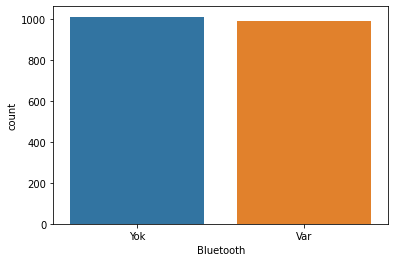

In [9]:
sns.countplot(df["Bluetooth"]);

In [10]:
df["CiftHat"].value_counts()

Var    1019
Yok     981
Name: CiftHat, dtype: int64

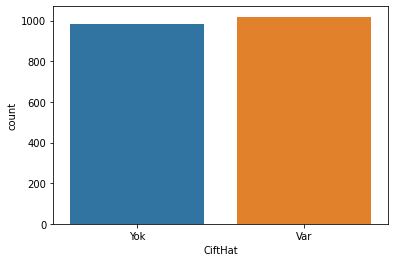

In [11]:
sns.countplot(df["CiftHat"]);

In [12]:
df["4G"].value_counts()

Var    1043
Yok     957
Name: 4G, dtype: int64

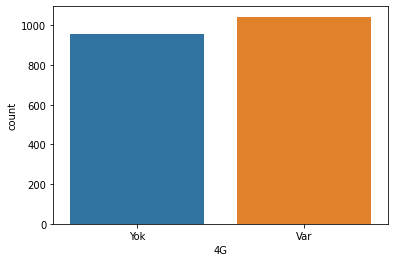

In [13]:
sns.countplot(df["4G"]);

In [14]:
df["3G"].value_counts()

Var    1523
Yok     477
Name: 3G, dtype: int64

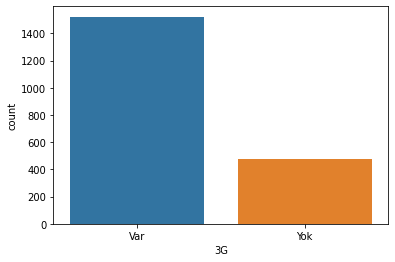

In [15]:
sns.countplot(df["3G"]);

In [16]:
df["Dokunmatik"].value_counts()

Var    1006
Yok     994
Name: Dokunmatik, dtype: int64

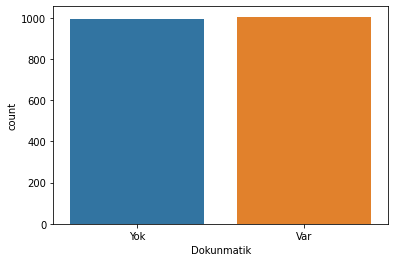

In [17]:
sns.countplot(df["Dokunmatik"]);

In [18]:
df["WiFi"].value_counts()

Var    1014
Yok     986
Name: WiFi, dtype: int64

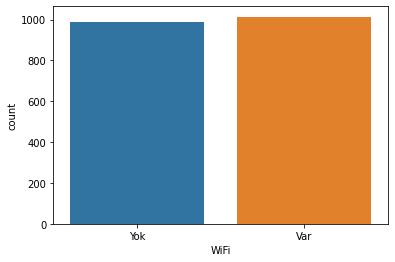

In [19]:
sns.countplot(df["WiFi"]);

In [20]:
df["Renk"].value_counts()

Beyaz         194
Siyah         183
Mor           175
Turuncu       175
Pembe         168
Kırmızı       168
Turkuaz       167
Kahverengi    157
Sarı          156
Yeşil         154
Gri           153
Mavi          150
Name: Renk, dtype: int64

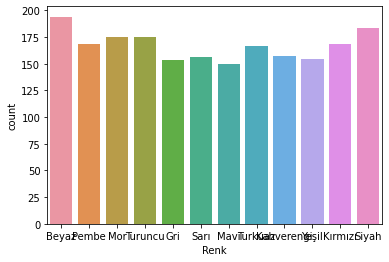

In [21]:
sns.countplot(df["Renk"]);

Makine Öğrenmesi kısmında kullancağımız için FiyatAraligi özniteliğine detaylı baalım.

In [22]:
df['FiyatAraligi'].value_counts()

Normal      500
Pahalı      500
Ucuz        500
Çok Ucuz    500
Name: FiyatAraligi, dtype: int64

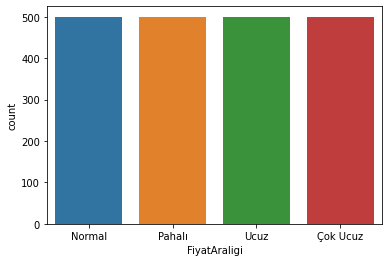

In [23]:
sns.countplot(x = "FiyatAraligi", data = df);

Burada da fiyat aralığında dengeli bir dağılımın olduğunu gördük.

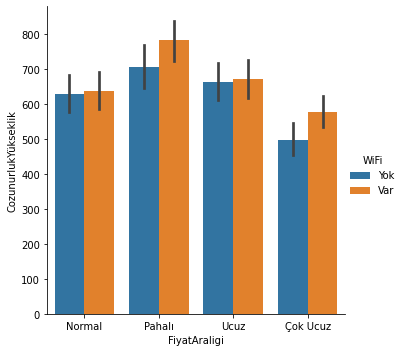

In [24]:
sns.factorplot("FiyatAraligi", "CozunurlukYükseklik","WiFi", data = df, kind = "bar");

In [25]:
df.isna().sum().sum()
# veri cercevemizde toplam kac adet eksik deger oldugunu gozlemledik.

17

In [26]:
df.isna().sum()
#burada eksik gozlemler hangi degiskenlere ait ve kacar adet goruntulemis oluyoruz.

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

RAM özniteliğinden 12 gözlemde ve OnKameraMP özniteliğinden 5 gözlemin eksik değer olduğunu görüntülüyoruz

In [27]:
df.describe().T
# Veri çerçevesindeki sayısal değişkenler için temel istatistik değerlerini görüntüleyelim.

,count,mean,std,min,25%,50%,75%,max
BataryaGucu,2000.0,1238.518500,439.418206,501.0,851.75,1226.0,1615.25,1998.0
MikroislemciHizi,2000.0,1.522250,0.816004,0.5,0.70,1.5,2.20,3.0
OnKameraMP,1995.0,4.312281,4.342095,0.0,1.00,3.0,7.00,19.0
DahiliBellek,2000.0,32.046500,18.145715,2.0,16.00,32.0,48.00,64.0
Kalinlik,2000.0,0.501750,0.288416,0.1,0.20,0.5,0.80,1.0
Agirlik,2000.0,140.249000,35.399655,80.0,109.00,141.0,170.00,200.0
CekirdekSayisi,2000.0,4.520500,2.287837,1.0,3.00,4.0,7.00,8.0
ArkaKameraMP,2000.0,9.916500,6.064315,0.0,5.00,10.0,15.00,20.0
CozunurlukYükseklik,2000.0,645.108000,443.780811,0.0,282.75,564.0,947.25,1960.0
CozunurlukGenislik,2000.0,1251.515500,432.199447,500.0,874.75,1247.0,1633.00,1998.0


Veri çerçevesindeki yüzdelik dilim, ortalama, std vb. gibi bazı temel istatistiksel ayrıntıları veya bir dizi sayısal değeri görüntülemiş olduk.

**Yorumlayalım:**

OnKameraMP ve ArkaKameraMP özniteliklerinin bazı gözlemlerinde minumun değerin 0 olduğunu buna binayen de bazı tabletlerin On Kamera ya da Arka Kamera bulunmadığını söyleyebiliriz.

Standart sapma olarak, diğer özniteliklere göre BataryaGucu, CozunurlukYükseklik, CozunurlukGenislik ve RAM öznitelikleri daha yüksek. Bu öznitelikler arasında veri çeşitliliğinin daha fazla olduğunu söyleyebiliriz. Demek ki bu değerlerin bir standartı yok. Min ve Max değerleri arasındaki farkın çokluğu da bize bu durumu gösterir.

Kalınlık özniteliğinde ise standart sapma en küçük değerde, bu öznitelikte tabletler bu öznitelikte için bir standartın var olduğunu gösterir.

Verilerimizde standart sapma ortalamalardan büyük ise öznitelikdeki verilerin düzgün dağılmadığını söyleyebiliriz. Bu durum ise aşırı bir noktada olmasa da OnKameraMP özniteliğinde görülmektedir.

In [28]:
corr = df.corr() #Korelasyon degerini gozlemleyelim.
corr

,BataryaGucu,MikroislemciHizi,OnKameraMP,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru
BataryaGucu,1.000000,0.011482,0.032167,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000883,0.052510
MikroislemciHizi,0.011482,1.000000,-0.000172,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003969,-0.011432
OnKameraMP,0.032167,-0.000172,1.000000,-0.028642,-0.001723,0.024585,-0.013721,0.645697,-0.010662,-0.005646,0.012528,-0.007121
DahiliBellek,-0.004004,0.006545,-0.028642,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032883,-0.002790
Kalinlik,0.034085,-0.014364,-0.001723,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.007293,0.017003
Agirlik,0.001844,0.012350,0.024585,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002536,0.006209
CekirdekSayisi,-0.029727,-0.005724,-0.013721,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.005576,0.013148
ArkaKameraMP,0.031441,-0.005245,0.645697,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.029540,0.014657
CozunurlukYükseklik,0.014901,-0.014523,-0.010662,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.023421,-0.010645
CozunurlukGenislik,-0.008402,-0.009476,-0.005646,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.002101,0.006720


Daha rahat yorumlayabilmek için heatmap çizdirelim.

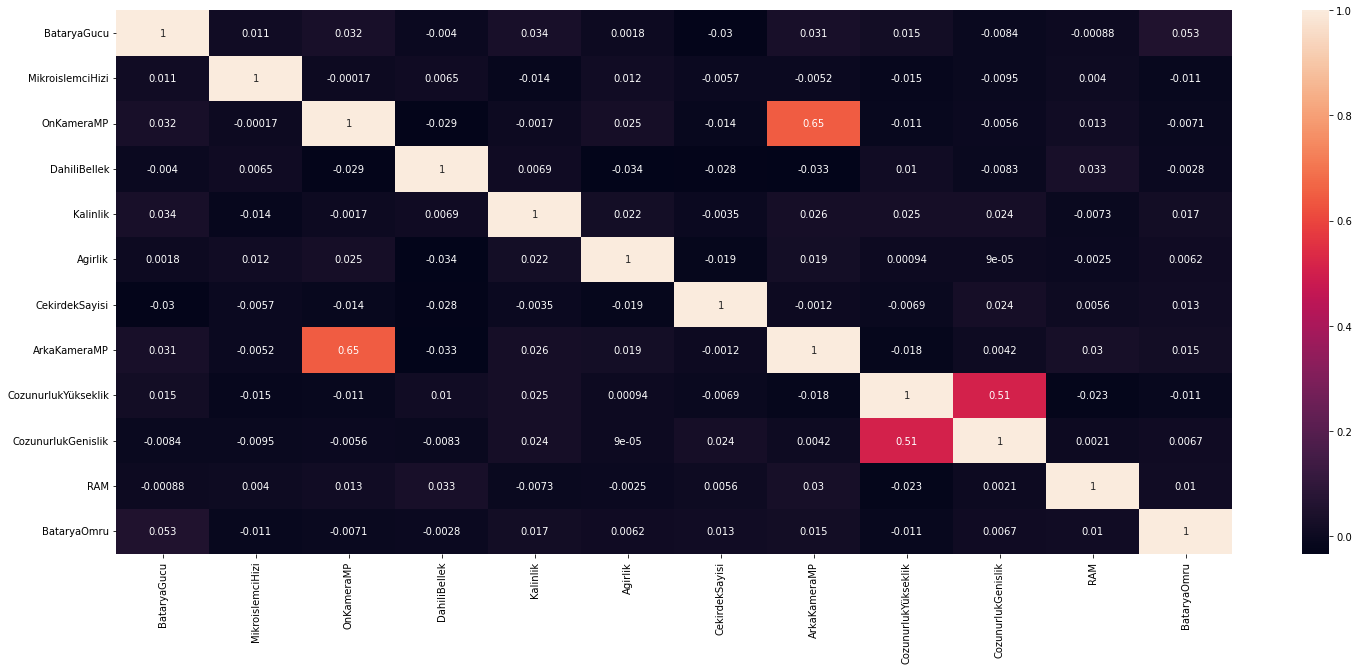

In [29]:
plt.subplots(figsize=(25,10))
corr = df.corr()
sns.heatmap(corr,annot = True,
           xticklabels=corr.columns.values,
           yticklabels=corr.columns.values);

Tablomuzun neredeyse tamamina yakini siyah renkte dolayisiyla oznitelikler arasindaki iliski yok denecek kadar az.

Tablomuzdandan görüldüğü üzere dikkatimizi çeken ilk iliski OnKameraMP ve ArkaKameraMP degerleri. Diğer ilişki ise CozunurlukYukseklik ve CozunurlukGenislik degerleri. Aralarinda zayif olsada bir iliski oldugunu gormekteyiz.

En güçlü pozitif ilişki ArkaKameraMP ile OnKameraMP arasındadır. Bu ilişkinin katsayısı: 0,65'tir.

Buradan demek ki bir cihazın arka kamera değeri yüksek ise ön kamera değeri de yüksek olacaktır gibi bir çıkarım yapabiliriz.

Bir diğer durum ise Çözünürlük özniteliklerinde. Eğer bir cihazın genişliği artıkça çözünürlüğü de artmakta. Bu durum da bizlerin akıl süzgecine uygun çünkü cihazlar büyüdükçe ekran kalitesini koruyabilmemiz için çözünürlüklerini de artırmalıyız

En güçlü negatif ilişki ArkaKameraMP ile DahiliBellek arasındadır. Bu ilişkinin katsayısı: -0,033'tür.

In [30]:
df.corr()["ArkaKameraMP"]["OnKameraMP"]

0.6456968663318242

Burada korelasyon iliskisi en yuksek olan iki ozniteligimiz arasindaki korelasyon oranini görüyoruz fakat burada çok güçlü bir ilişki varlığından bahsedemeyiz. Orta duzeyde bir iliski oldugunu soyleyebiliriz.

In [31]:
#bir diğer dikkat çeken öznitelikler arasıdaki korelasyonu inceleyelim.
df.corr()["CozunurlukYükseklik"]["CozunurlukGenislik"]

0.5106644191393149

Burada aralarinda iliski olan bir diger CozunurlukYükseklik ve CozunurlukGenislik olan iki ozniteligimiz arasindaki korelasyon oranini 0.5106 seklinde bulmuş olduk fakat burada da güçlü bir ilişki vardir diyemeyiz.Orta duzeyde bir iliski olarak kabul edebiliriz.

**Veri cercevemizin ozniteliklerini kendi icinde degerlendirelim.**

In [32]:
df["FiyatAraligi"].unique()
# Buradan FiyatAraligi degiskenimizin 4 adet benzersiz degiskeni oldugunu gormus olduk

array(['Normal', 'Pahalı', 'Ucuz', 'Çok Ucuz'], dtype=object)

In [33]:
df["ArkaKameraMP"].nunique()
# Buradan ArkaKameraMP degiskenimizin 21 adet benzersiz degiskeni oldugunu gormus olduk

21

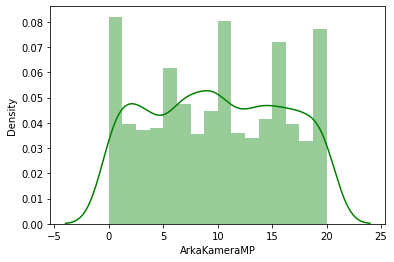

In [34]:
sns.distplot(df["ArkaKameraMP"], bins=16, color="green");
# displot -> dagilim gorsellestirmek icin kullanilan bir fonksiyon

In [35]:
df["OnKameraMP"].nunique()
# Buradan OnKameraMP degiskenimizin 20 adet benzersiz degiskeni oldugunu gormus olduk

20

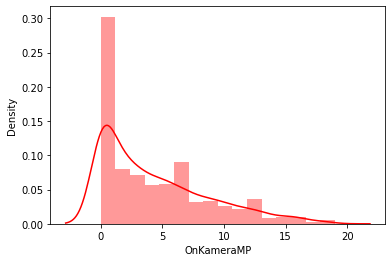

In [36]:
sns.distplot(df["OnKameraMP"], bins = 16, color="red");

In [37]:
df["MikroislemciHizi"].nunique()
# Buradan MikroislemciHizi degiskenimizin 26 adet benzersiz degiskeni oldugunu gormus olduk

26

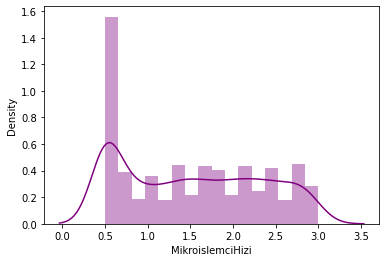

In [38]:
sns.distplot(df["MikroislemciHizi"], bins = 16, color = "purple");


Bu grafigimizden MikroislemciHizi ile ilgili 0.5 ila 3.0 arasinda degerler aldigini gormekteyiz.


Simdi aralarinda iliski olan OnKameraMP ve ArkaKameraMP ozniteliklerinin grafigini inceleyelim.

<Figure size 1296x360 with 0 Axes>

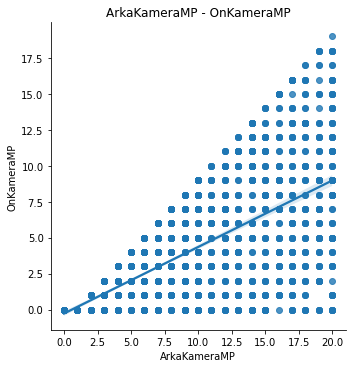

In [39]:
plt.figure(figsize=(18,5))
sns.lmplot(x="ArkaKameraMP", y="OnKameraMP", data=df)
plt.title('ArkaKameraMP - OnKameraMP')
plt.show()

Buradaki grafigimizden ArkaKameraMP ozniteliginin degeri arttikca OnKameraMP degerimiz de artis gostermekte oldugunu soyleyebiliriz.

Simdi ise ***FiyatAraligi*** ozniteligimiz icin diger degiskenlerin dagilimini gorsellestirelim. Ilk olarak RAM degiskeni ile arasindaki iliskiyi goruntuleyelim.

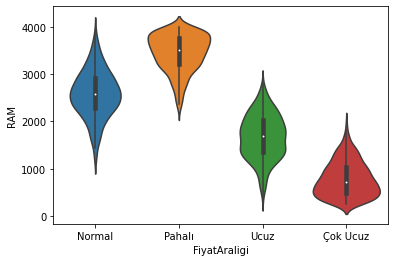

In [40]:
sns.violinplot(x = "FiyatAraligi", y = "RAM", data = df);

Buradaki grafigimizden FiyatAraligi pahali olanlarin daha fazla RAM degeri olacak oldugu sonucunu cikarabiliriz.

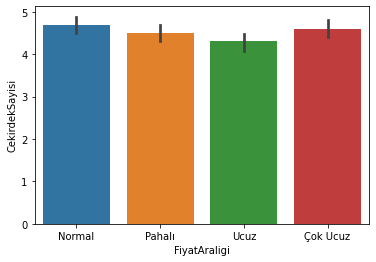

In [41]:
sns.barplot(x = "FiyatAraligi", y = "CekirdekSayisi", data = df);

Buradaki grafigimizden FiyatAraligi ozniteligi ile CekirdekSayisi arasindaki iliskiyi goruntulemis olduk.

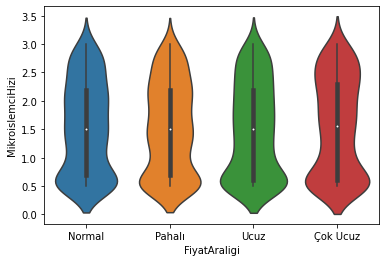

In [42]:
sns.violinplot(x = "FiyatAraligi", y = "MikroislemciHizi", data = df);

Buradaki grafigimizden FiyatAraligi pahali olanlarin daha fazla MikroislemciHizi degeri olacak oldugu sonucunu cikarabiliriz. Fakat aralarinda cok buyuk bir fark da bulunmamakta.

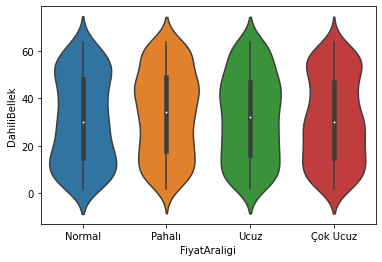

In [43]:
sns.violinplot(x = "FiyatAraligi", y = "DahiliBellek", data = df);

Buradaki grafigimizden FiyatAraligi pahali olanlarin daha fazla DahiliBellek degeri olacak oldugu sonucunu cikarabiliriz. Fakat aralarinda cok buyuk bir fark da bulunmamakta.

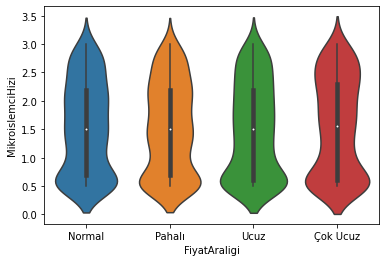

In [44]:
sns.violinplot(x = "FiyatAraligi", y = "MikroislemciHizi", data = df);

Buradaki grafigimizden FiyatAraligi pahali olanlarin daha fazla BataryaGucu oldugu sonucunu cikarabiliriz.

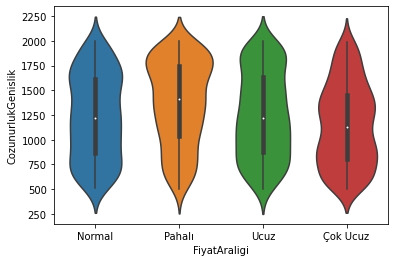

In [45]:
sns.violinplot(x = "FiyatAraligi", y = "CozunurlukGenislik", data = df);

Buradaki grafigimizden FiyatAraligi pahali olanlarin daha fazla CozunurlukGenislik degeri olacak oldugu sonucunu cikarabiliriz.

***Çıkarım:*** 

Genel olarak baktığımızda ilişklerde anormal olarak gözlemlediğimiz bir durum yok. 

Eksik değerlerimiz mevcut bunlar uygun biçimde doldurulmalı.

RAM hariç diğer özniteliklerimizde farklı fiyat kategorilerindeki tabletlerin benzer grafiklere sahip olduğunu görmektedir.
Bu durum sınıflandırma yaparken bu özelliklerin aslında çok da belirleyici bir özelliği olmadığı konusunda bizi bilgilendirir.

<h2 style="color:#00BFFF">Veri Ön İşleme</h2> 

Toplanan verilerin tutarsız olanlarını eleyerek, silerek,ekleyerek, değiştirerek makineye öğrenmesi aşamasına datasetimiz hazırlamalıyız.

In [46]:
#Özniteliklerimizi tekrar gözlemleyelim.
df.columns

Index(['BataryaGucu', 'Bluetooth', 'MikroislemciHizi', 'CiftHat', 'OnKameraMP',
       '4G', 'DahiliBellek', 'Kalinlik', 'Agirlik', 'CekirdekSayisi',
       'ArkaKameraMP', 'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM',
       'BataryaOmru', '3G', 'Dokunmatik', 'WiFi', 'FiyatAraligi', 'Renk'],
      dtype='object')

In [47]:
#Eksik değerleri tekrar gözlemleyelim.
df.isnull().sum() 

BataryaGucu             0
Bluetooth               0
MikroislemciHizi        0
CiftHat                 0
OnKameraMP              5
4G                      0
DahiliBellek            0
Kalinlik                0
Agirlik                 0
CekirdekSayisi          0
ArkaKameraMP            0
CozunurlukYükseklik     0
CozunurlukGenislik      0
RAM                    12
BataryaOmru             0
3G                      0
Dokunmatik              0
WiFi                    0
FiyatAraligi            0
Renk                    0
dtype: int64

Eksik değerleri farklı yöntemlerle doldurabiliriz. Uygun olan yöntemi seçerek bu problemi çözelim.

In [48]:
#Biz eksik değerleri ortalama değerlerle dolduruyoruz.
df = df.fillna(df.mean())  
df

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,Yok,1.9,Yok,2.0,Yok,50,0.1,146,1,10,499,695,2328.0,2,Var,Yok,Yok,Normal,Beyaz
1,1046,Var,2.8,Var,0.0,Var,58,0.2,100,8,0,259,1040,3863.0,9,Var,Var,Var,Pahalı,Pembe
2,843,Yok,1.3,Var,1.0,Yok,16,0.9,119,7,4,593,732,1734.0,14,Yok,Yok,Var,Ucuz,Mor
3,894,Yok,0.5,Var,1.0,Var,50,0.5,199,3,14,1285,1462,3615.0,6,Var,Yok,Var,Pahalı,Turuncu
4,936,Yok,1.0,Yok,1.0,Yok,18,0.2,153,3,18,1330,1686,2391.0,3,Var,Var,Var,Normal,Beyaz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,Yok,2.9,Var,3.0,Var,7,0.8,147,2,6,487,722,1241.0,16,Var,Yok,Yok,Çok Ucuz,Siyah
1996,1654,Yok,1.8,Yok,1.0,Yok,11,0.3,146,7,2,1184,1719,1070.0,14,Var,Var,Var,Ucuz,Sarı
1997,742,Yok,2.2,Var,4.0,Yok,56,0.2,190,7,14,577,1359,3557.0,12,Yok,Var,Var,Pahalı,Turuncu
1998,704,Yok,2.2,Var,4.0,Yok,53,0.2,186,6,6,251,1013,3653.0,15,Var,Var,Var,Normal,Turkuaz


In [49]:
#Eksik değer kalmış mı diye kontrol edelim.
df.isnull().sum().sum()

0

Eksik değerlerimiz doldurduk aykırı değerlerimizi kontrol edelim

Verimizdeki aykırı değerleri bulmanın yöntemlerinden kartil'lere bölmektir. Verimizi 4 eşit parçaya bölerek bu sınırların dışında kalan verileri aykırı değer olarak adlandırırız. Boxplotlarda kartil'leri görselleştirmemizi sağlar. Ben datamızın aykırı veri analizini görsel açıdan görebilmek adına boxplot ile inceleyelim.

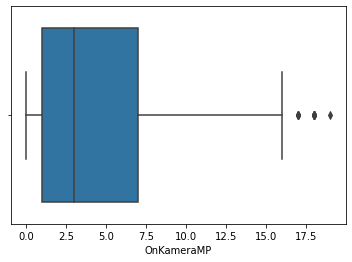

In [50]:
sns.boxplot(x = df['OnKameraMP']);

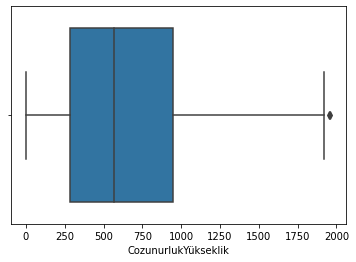

In [51]:
sns.boxplot(x = df['CozunurlukYükseklik']);

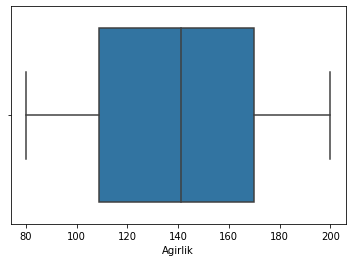

In [52]:
sns.boxplot(x = df['Agirlik']);

<AxesSubplot:xlabel='RAM', ylabel='Density'>

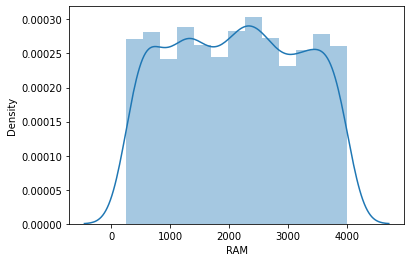

In [53]:
#Bir tane de histogramla gösterime örnek verelim.
sns.distplot(df.RAM)

**One-Hot Encoding**

 Veri setindeki kategorik değerlerini sayısallaştırma işlemini gerçekleştirelim. 
 
 Kaç adet böyle sütunumuz olduğunu görelim ve başlayalım.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BataryaGucu          2000 non-null   int64  
 1   Bluetooth            2000 non-null   object 
 2   MikroislemciHizi     2000 non-null   float64
 3   CiftHat              2000 non-null   object 
 4   OnKameraMP           2000 non-null   float64
 5   4G                   2000 non-null   object 
 6   DahiliBellek         2000 non-null   int64  
 7   Kalinlik             2000 non-null   float64
 8   Agirlik              2000 non-null   int64  
 9   CekirdekSayisi       2000 non-null   int64  
 10  ArkaKameraMP         2000 non-null   int64  
 11  CozunurlukYükseklik  2000 non-null   int64  
 12  CozunurlukGenislik   2000 non-null   int64  
 13  RAM                  2000 non-null   float64
 14  BataryaOmru          2000 non-null   int64  
 15  3G                   2000 non-null   o

8 adet obje türünden veri olduğunu görüyoruz. Bunları inceleyelim.

In [55]:
KategorikDegerlerim = list(df.select_dtypes(include=['object']).columns)
KategorikDegerlerim

['Bluetooth',
 'CiftHat',
 '4G',
 '3G',
 'Dokunmatik',
 'WiFi',
 'FiyatAraligi',
 'Renk']

In [56]:
df["Bluetooth"].unique() 

array(['Yok', 'Var'], dtype=object)

In [57]:
df["CiftHat"].unique() 

array(['Yok', 'Var'], dtype=object)

In [58]:
df["4G"].unique() 

array(['Yok', 'Var'], dtype=object)

In [59]:
df["3G"].unique() 

array(['Var', 'Yok'], dtype=object)

In [60]:
df["Dokunmatik"].unique() 

array(['Yok', 'Var'], dtype=object)

In [61]:
df["WiFi"].unique() 

array(['Yok', 'Var'], dtype=object)

Buraya kadar gözlemlediğimiz kategorik değişkenlerin hepsi var veya yoktan oluşuyor o zaman bunları 0-1 şeklinde sayısallaştırabiliriz.

In [62]:
df.replace("Yok",0, inplace=True)
df.replace("Var",1, inplace=True)

In [63]:
#Yaptığımız değişimi gözlemleyelim.
df.head(10)

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,ArkaKameraMP,CozunurlukYükseklik,CozunurlukGenislik,RAM,BataryaOmru,3G,Dokunmatik,WiFi,FiyatAraligi,Renk
0,1325,0,1.9,0,2.0,0,50,0.1,146,1,10,499,695,2328.0,2,1,0,0,Normal,Beyaz
1,1046,1,2.8,1,0.0,1,58,0.2,100,8,0,259,1040,3863.0,9,1,1,1,Pahalı,Pembe
2,843,0,1.3,1,1.0,0,16,0.9,119,7,4,593,732,1734.0,14,0,0,1,Ucuz,Mor
3,894,0,0.5,1,1.0,1,50,0.5,199,3,14,1285,1462,3615.0,6,1,0,1,Pahalı,Turuncu
4,936,0,1.0,0,1.0,0,18,0.2,153,3,18,1330,1686,2391.0,3,1,1,1,Normal,Beyaz
5,1162,0,1.0,0,0.0,0,50,0.5,104,4,10,332,866,1404.0,15,1,1,1,Ucuz,Beyaz
6,1849,1,0.5,0,1.0,0,29,0.5,181,7,12,978,1986,3330.0,15,1,0,1,Pahalı,Gri
7,1860,0,0.5,1,2.0,1,55,0.7,83,6,3,195,799,676.0,4,1,0,1,Çok Ucuz,Beyaz
8,1536,0,0.8,0,12.0,0,13,0.3,105,7,20,22,1634,2020.0,16,1,1,0,Normal,Sarı
9,539,1,0.6,1,9.0,0,21,0.1,145,7,14,551,599,3597.0,9,0,0,0,Normal,Mavi


Fiyat aralığı ve renk özniteliklerimizi sayısallaştıralım.

In [64]:
df["Renk"].unique() 
#Renk e ait benzersiz değerleri görüntüleyelim.

array(['Beyaz', 'Pembe', 'Mor', 'Turuncu', 'Gri', 'Sarı', 'Mavi',
       'Turkuaz', 'Kahverengi', 'Yeşil', 'Kırmızı', 'Siyah'], dtype=object)

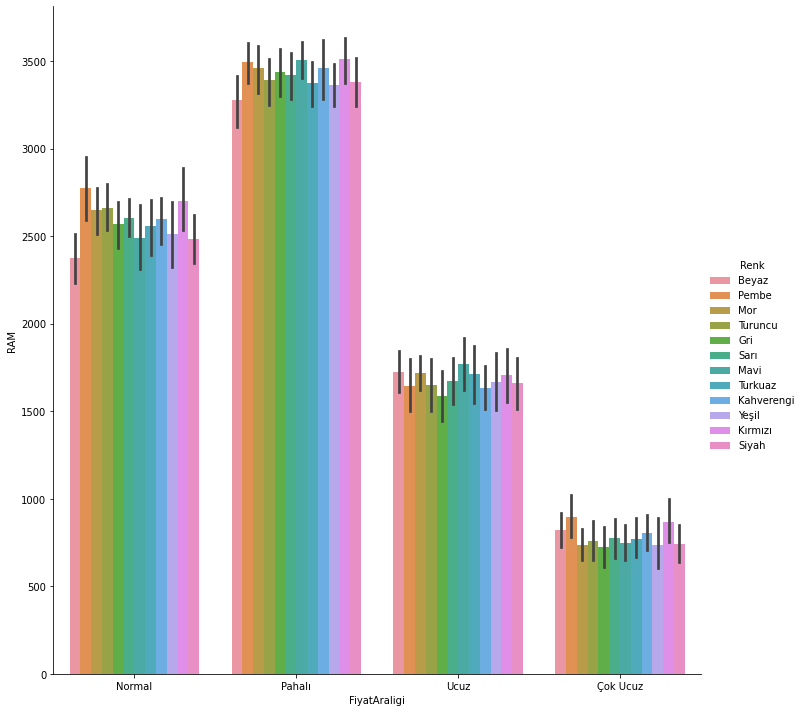

In [65]:
sns.factorplot("FiyatAraligi", "RAM", "Renk", data = df, kind = "bar",size=10, aspect=1);

Bu grafikten rengin FiyatAralıgına bir etkisi olmadıgını anlıyoruz bu yüzden ileride verisetimizden çıkartabiliriz.Fakat şimdilik dummies ile bu öznitelik değerlerimizi sayısallaştıralım.

In [66]:

df['Renk'] = pd.Categorical(df['Renk'])
dfDummies = pd.get_dummies(df['Renk'], prefix = 'Renk')
df = pd.concat([df, dfDummies], axis=1)

In [67]:
df.drop(['Renk', 'Renk_Yeşil'], axis = 1, inplace = True)

In [68]:
df.columns

Index(['BataryaGucu', 'Bluetooth', 'MikroislemciHizi', 'CiftHat', 'OnKameraMP',
       '4G', 'DahiliBellek', 'Kalinlik', 'Agirlik', 'CekirdekSayisi',
       'ArkaKameraMP', 'CozunurlukYükseklik', 'CozunurlukGenislik', 'RAM',
       'BataryaOmru', '3G', 'Dokunmatik', 'WiFi', 'FiyatAraligi', 'Renk_Beyaz',
       'Renk_Gri', 'Renk_Kahverengi', 'Renk_Kırmızı', 'Renk_Mavi', 'Renk_Mor',
       'Renk_Pembe', 'Renk_Sarı', 'Renk_Siyah', 'Renk_Turkuaz',
       'Renk_Turuncu'],
      dtype='object')

In [69]:
#Fiyat aralığı değerlerimiz de düzeltebiliriz fakat bu öznitelik üzerinde tahminleme yapacağız ve inceleyeceğiz.
#Anlaşılabilirliği arttırmak için bu şekilde bırakıyorum.
df["FiyatAraligi"].unique() 

array(['Normal', 'Pahalı', 'Ucuz', 'Çok Ucuz'], dtype=object)

<h2 style="color:#00BFFF"><center>Makine Ögrenmesi(Machine Learning)<center> </h2> 

![](https://miro.medium.com/max/1400/1*QOtSBPkqhK4LssWo9Pzipg.png)

<h2 style="color:#00BFFF">Naive Bayes Algoritması  </h2> 

* İsmini Tomas Bayesten alan her bir öznteliğin birbirinden bağımsız kabul edilip oluşturulmuş bir sınıflandırma algoritmasıdır. Eğitim (train) ve test (test) verilerinin modele verilmesi ile modelin bize tahmin sonuçlar vermesini sağlarız.

> Bu safhada modellemeleri yapabilmek için hedef degiskenimiz olan “FiyatAraligi” degiskeni ve bu degiskeni tahmin etmemize yardımcı olacak diğer değişkenler bağımlı ve bağımsız değişkenler olmak üzere ayrılmalıdır.

> Hedef degiskenimiz ****"FiyatAraligi"**** degiskeni oldugu icin bu degiskenimiz bagimli degiskenimiz olacaktir

Veri çerçevemizi bağımlı ve bağımsız değişkenler olmak üzere bölütleyelim.

In [70]:
y = df["FiyatAraligi"]# hedef özniteliğimiz.
X = df.drop("FiyatAraligi", axis = 1)# çıkarımda bulunacağımız özniteliklerimiz


In [71]:
y
#bagimli degiskenimizi goruntulemis olduk(FiyatAraligi)

0         Normal
1         Pahalı
2           Ucuz
3         Pahalı
4         Normal
          ...   
1995    Çok Ucuz
1996        Ucuz
1997      Pahalı
1998      Normal
1999      Normal
Name: FiyatAraligi, Length: 2000, dtype: object

In [72]:
X
#bagimsiz degiskenlerimizi goruntulemis olduk

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Renk_Gri,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu
0,1325,0,1.9,0,2.0,0,50,0.1,146,1,...,0,0,0,0,0,0,0,0,0,0
1,1046,1,2.8,1,0.0,1,58,0.2,100,8,...,0,0,0,0,0,1,0,0,0,0
2,843,0,1.3,1,1.0,0,16,0.9,119,7,...,0,0,0,0,1,0,0,0,0,0
3,894,0,0.5,1,1.0,1,50,0.5,199,3,...,0,0,0,0,0,0,0,0,0,1
4,936,0,1.0,0,1.0,0,18,0.2,153,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,689,0,2.9,1,3.0,1,7,0.8,147,2,...,0,0,0,0,0,0,0,1,0,0
1996,1654,0,1.8,0,1.0,0,11,0.3,146,7,...,0,0,0,0,0,0,1,0,0,0
1997,742,0,2.2,1,4.0,0,56,0.2,190,7,...,0,0,0,0,0,0,0,0,0,1
1998,704,0,2.2,1,4.0,0,53,0.2,186,6,...,0,0,0,0,0,0,0,0,1,0


Özniteliklerimi bagımlı ve bağımsız değişkenlere bölütledik ve görüntüledik.Şimdi bu bağımlı ve bağımsız değişkenlerden train ve test olmak üzere 4 parça oluşturalım. Bunu yapmak için train_test_split kullanalım.

<h3 style="color:#FF69B4">Neden train_test_split kullanıyoruz </h3>
%75 train,%25 test olarak bölütledik.eğitim için kullanılan modeli test etmek için aynı verileri kullanırsak,daha iyi performan saglanacaktır.Ancak bu çok iyi değildir,fazla uyum sorunlarına yol açacaktır.Yani model verileri ezberler ve veri saglamayacaktır.Görünmeyen veriler içinde dogru sonuçlar verebilir.

 Verinin %75 kısımını egitim için, test için ise %25'lik kısmını kullanacağız.

![](https://www.researchgate.net/profile/Brian-Mwandau/publication/325870973/figure/fig6/AS:639531594285060@1529487622235/Train-Test-Data-Split.png)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

Verilerimizi <mark>%25 oranını test</mark> %75 oranını da eğitim için kullandık. Bunları gözlemleyelim.

In [74]:
X_train

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Renk_Gri,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu
1738,867,0,1.4,1,0.0,1,4,0.7,135,6,...,0,0,0,0,0,0,0,1,0,0
548,1404,0,2.1,0,16.0,0,44,0.9,151,1,...,0,1,0,0,0,0,0,0,0,0
936,683,1,2.1,0,7.0,0,30,0.1,197,7,...,0,0,0,0,0,0,0,1,0,0
1389,1109,1,2.8,1,6.0,0,57,0.9,151,1,...,0,0,0,0,0,0,0,0,0,1
1607,1395,0,1.8,1,0.0,0,23,0.1,111,3,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,605,0,1.0,0,8.0,1,9,0.1,142,3,...,0,0,1,0,0,0,0,0,0,0
1294,1149,1,2.2,0,4.0,0,30,0.2,106,6,...,0,1,0,0,0,0,0,0,0,0
860,534,0,0.5,1,4.0,0,2,0.2,85,5,...,1,0,0,0,0,0,0,0,0,0
1459,1720,0,1.6,0,18.0,1,2,0.8,188,5,...,0,0,0,0,0,0,0,0,1,0


In [75]:
X_test

,BataryaGucu,Bluetooth,MikroislemciHizi,CiftHat,OnKameraMP,4G,DahiliBellek,Kalinlik,Agirlik,CekirdekSayisi,...,Renk_Gri,Renk_Kahverengi,Renk_Kırmızı,Renk_Mavi,Renk_Mor,Renk_Pembe,Renk_Sarı,Renk_Siyah,Renk_Turkuaz,Renk_Turuncu
1860,1433,1,2.3,0,2.0,1,5,0.1,129,5,...,0,0,0,0,0,0,0,0,0,0
353,1174,1,0.9,0,7.0,0,30,1.0,147,4,...,0,0,0,0,0,0,0,1,0,0
1333,999,0,2.6,1,11.0,1,56,1.0,165,4,...,0,0,0,0,0,1,0,0,0,0
905,972,1,0.5,1,5.0,0,13,0.4,193,5,...,0,0,0,0,0,0,0,0,1,0
1289,1811,1,2.5,0,4.0,1,5,0.6,98,4,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,1530,0,2.0,0,11.0,0,42,0.8,177,6,...,0,0,0,0,1,0,0,0,0,0
1356,668,0,2.3,0,2.0,1,48,0.3,114,1,...,0,0,0,0,0,0,0,0,1,0
408,1179,1,0.8,0,1.0,0,5,0.9,154,5,...,0,0,1,0,0,0,0,0,0,0
1614,1456,0,1.6,1,9.0,1,39,0.1,80,8,...,0,0,1,0,0,0,0,0,0,0


In [76]:
y_train

1738    Çok Ucuz
548         Ucuz
936         Ucuz
1389      Normal
1607      Normal
          ...   
1130    Çok Ucuz
1294      Pahalı
860       Normal
1459      Normal
1126        Ucuz
Name: FiyatAraligi, Length: 1500, dtype: object

In [77]:
y_test

1860        Ucuz
353     Çok Ucuz
1333      Normal
905         Ucuz
1289      Normal
          ...   
765     Çok Ucuz
1356    Çok Ucuz
408     Çok Ucuz
1614      Pahalı
694       Normal
Name: FiyatAraligi, Length: 500, dtype: object

 Verilerimiz kaç gözlemden oluşuyor? 

In [78]:
X_train.shape

(1500, 29)

In [79]:
y_train.shape

(1500,)

In [80]:
X_test.shape

(500, 29)

In [81]:
y_test.shape

(500,)

GaussianNB modeli yaratalım ve eğitim verilerimiz ile modelimizi eğitelim.

In [82]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)

In [83]:
nb_model


GaussianNB()

Model üzerinde yazılabilecek tüm komutları görüntüleyelim

In [84]:
dir(nb_model)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_X',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_joint_log_likelihood',
 '_more_tags',
 '_partial_fit',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_update_mean_variance',
 '_validate_data',
 'class_count_',
 'class_prior_',
 'classes_',
 'epsilon_',
 'feature_names_in_',
 'fit',
 'get_params',
 'n_features_in_',
 'partial_fit',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'priors',
 'score',
 'set_params',
 'sigma_',
 'theta_',
 'var_',
 'var_smoothing']

In [85]:
y_pred = nb_model.predict(X_test) #Veri çerçevemizdeki test verilerini tahmin ettirip ve y_pred değişkenine atıyorum.

In [86]:
y_pred

array(['Normal', 'Çok Ucuz', 'Pahalı', 'Ucuz', 'Normal', 'Normal',
       'Pahalı', 'Ucuz', 'Normal', 'Ucuz', 'Ucuz', 'Normal', 'Normal',
       'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Ucuz', 'Çok Ucuz',
       'Ucuz', 'Ucuz', 'Ucuz', 'Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Normal',
       'Çok Ucuz', 'Normal', 'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz',
       'Çok Ucuz', 'Normal', 'Normal', 'Ucuz', 'Normal', 'Pahalı',
       'Pahalı', 'Çok Ucuz', 'Çok Ucuz', 'Ucuz', 'Normal', 'Ucuz',
       'Pahalı', 'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz',
       'Çok Ucuz', 'Pahalı', 'Pahalı', 'Pahalı', 'Pahalı', 'Normal',
       'Çok Ucuz', 'Çok Ucuz', 'Çok Ucuz', 'Ucuz', 'Normal', 'Pahalı',
       'Çok Ucuz', 'Ucuz', 'Normal', 'Ucuz', 'Pahalı', 'Çok Ucuz', 'Ucuz',
       'Çok Ucuz', 'Ucuz', 'Normal', 'Ucuz', 'Pahalı', 'Çok Ucuz', 'Ucuz',
       'Normal', 'Normal', 'Pahalı', 'Pahalı', 'Normal', 'Ucuz',
       'Çok Ucuz', 'Çok Ucuz', 'Normal', 'Normal', 'Ucuz', 'Pahalı',
       'Ucuz', 'Çok Ucuz',

In [87]:
y_test 

1860        Ucuz
353     Çok Ucuz
1333      Normal
905         Ucuz
1289      Normal
          ...   
765     Çok Ucuz
1356    Çok Ucuz
408     Çok Ucuz
1614      Pahalı
694       Normal
Name: FiyatAraligi, Length: 500, dtype: object

Tahmini değerleri gerçek değerlerle karşılaştıralım.

In [88]:
test_df = pd.DataFrame({'Gerçek Fiyat Aralığı':y_test, 'Tahmin Edilen Fiyat Aralığı':y_pred})
test_df

,Gerçek Fiyat Aralığı,Tahmin Edilen Fiyat Aralığı
1860,Ucuz,Normal
353,Çok Ucuz,Çok Ucuz
1333,Normal,Pahalı
905,Ucuz,Ucuz
1289,Normal,Normal
...,...,...
765,Çok Ucuz,Ucuz
1356,Çok Ucuz,Çok Ucuz
408,Çok Ucuz,Çok Ucuz
1614,Pahalı,Pahalı


Tahminlerimizin başırısını daha iyi görebilmek için doğru mu yanlış mı olduğunu daha net anlayabileceğimiz bir sütun ekliyorum.

In [89]:
dfPredict = pd.DataFrame({"Gercek Degerler" : y_test, "Tahmin Edilen Degerler" : y_pred, "Gerçek ile Tahmin Arasindaki Uyusma":y_pred == y_test})

dfPredict.head(10)

,Gercek Degerler,Tahmin Edilen Degerler,Gerçek ile Tahmin Arasindaki Uyusma
1860,Ucuz,Normal,False
353,Çok Ucuz,Çok Ucuz,True
1333,Normal,Pahalı,False
905,Ucuz,Ucuz,True
1289,Normal,Normal,True
1273,Normal,Normal,True
938,Pahalı,Pahalı,True
1731,Ucuz,Ucuz,True
65,Normal,Normal,True
1323,Normal,Ucuz,False


Dogruluk skorunu görüntüleyelim

In [90]:
accuracy_score(y_test, y_pred) 

0.75

Confusion Matrix (Karmaşıklık Matrisi):
Kurulan bir sınıflandırma modelinin sonuçlarını yorumlayabilmek, gerçek ve tahmin edilen değerler arasında yer alan ilişkideki hataları çapraz olarak inceleyebilmek için confusion matrix kullanılır.

In [91]:
karmasiklik_matrisi = confusion_matrix(y_test,y_pred)
print(karmasiklik_matrisi)

[[ 80  22  29   0]
 [ 27  85   1   0]
 [ 25   0  92  10]
 [  0   0  11 118]]


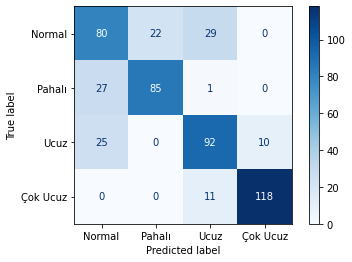

In [92]:
disp = plot_confusion_matrix(nb_model, X_test, y_test, cmap='Blues', values_format='d')

Peki daha iyi sonuç alabilir miyiz **Feature Selection yöntemi** kullanarak modele etkisi düşük olan öznitelikleri kaldıralım. kBest tekniğini kullanarak her bir bağımsız değişkeni istatistiksel olarak filitrleyelim

In [93]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [94]:
len(X.columns)

29

In [95]:
test = SelectKBest(k = 29)
test

SelectKBest(k=29)

In [96]:
fit = test.fit(X, y)
fit

SelectKBest(k=29)

In [97]:
for indis, skor in enumerate(fit.scores_):
    print(skor, " -> ", X.columns[indis])

31.59815753989697  ->  BataryaGucu
0.4767677091173118  ->  Bluetooth
0.49370780102890643  ->  MikroislemciHizi
0.42823928557591956  ->  CiftHat
0.7302215314309588  ->  OnKameraMP
1.0595245262724162  ->  4G
2.9229960794178416  ->  DahiliBellek
1.5006824396689178  ->  Kalinlik
3.5943181851549952  ->  Agirlik
2.6254151540861677  ->  CekirdekSayisi
0.8254463576889531  ->  ArkaKameraMP
19.484841776704883  ->  CozunurlukYükseklik
22.620882490611052  ->  CozunurlukGenislik
3285.8633430873674  ->  RAM
1.6288113087357383  ->  BataryaOmru
0.4573197497059122  ->  3G
1.2933022318768916  ->  Dokunmatik
0.2849404695197208  ->  WiFi
0.7985277644423141  ->  Renk_Beyaz
0.7424648216639064  ->  Renk_Gri
1.8515556048444797  ->  Renk_Kahverengi
0.32874764864466033  ->  Renk_Kırmızı
0.8546411492461239  ->  Renk_Mavi
0.5900785144514252  ->  Renk_Mor
0.4845836368050502  ->  Renk_Pembe
0.2221109441940691  ->  Renk_Sarı
1.305164828542163  ->  Renk_Siyah
2.379774003890458  ->  Renk_Turkuaz
0.5733834743549536  ->

29 öznitelikten oluşuyor.Bu yüzden 29 parametresini eğitimde kullandık ve tüm özniteliklerin çok az skora sahip olduklarını sadece RAM özniteliğinin 4 haneli olduğunu hatta bazılarının 0'a yakın değerler aldığını görüntülemekteyiz.

Renk parametresinin degerleri küçük bir orana sahip rengi silip modeli tekrardan oluşturalım.Rengin etkisinin az olduğunu yukarda gözlemlemiştik.

In [98]:
y = df['FiyatAraligi']
X = df[["BataryaGucu", "CozunurlukYükseklik", "CozunurlukGenislik", "RAM", "WiFi", "Dokunmatik", "4G", "3G", "CiftHat", "Bluetooth", "BataryaOmru", "ArkaKameraMP", "CekirdekSayisi", "Agirlik", "Kalinlik", "DahiliBellek", "OnKameraMP", "MikroislemciHizi"]]

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size = 0.25, 
                                                    random_state = 42)

In [100]:
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [101]:
y_pred = nb_model.predict(X_test)

In [102]:
accuracy_score(y_test, y_pred)

0.812

***Yorum:***

 Görüldüğü üzere renk özniteliğini çıkardığımızda modelimizin  daha iyi sonuçlar verdiğini gözlemledik.Dogruluk skorumuz Renk özniteliği kullanırken 0.75 di.Renk özniteliğimizi çıkardığımızda ise dogruluk scorumuz 0.81 olarak gözlemledik.Yani yaklaşık olarak %7 oranında daha iyi sonuçlar vermektedir.

**Sınıflandırma problemlerinde** öncelikle veri setimizi train ve test setleri olarak ayırır daha sonra train veri seti üzerinden model oluşturur ve test veri seti üzerinde yapılan tahminleri test ederiz. Ancak train/test ayrımında bazı problemler bulunabilir . Veri seti ayrımını rastgele yapamamış olabiliriz . Sadece belirli bir yaşta , belirli bir bölgeden , sadece kadın ya da erkekleri seçip onlar üzerinden model kurmuş olabiliriz. Bu da **overfitting problemine** sebep olacaktır. Bu problemi **Cross Validation** ile çözebiliriz

![](https://i0.wp.com/dataaspirant.com/wp-content/uploads/2020/12/4-Cross-Validation-Procedure.png?resize=768%2C252&ssl=1)

Cross Validation bizi hem overfitting problemiyle karşı karşıya olup olmadığımızı hem de modelimizin kalitesini görmemizi sağlayacaktır. Böylece henüz görmediğimiz test veri setinde yüksek hata oranları ile karşılaşmadan önce modelimizin performansı test etmemizi sağlayacaktır.

In [103]:
cross_val_score(nb_model, X_test, y_test, cv = 10)

array([0.8 , 0.82, 0.82, 0.78, 0.8 , 0.72, 0.88, 0.82, 0.76, 0.78])

Bu 10 kez katlayarak aldığımız skorların ortalamasını alalım.

In [104]:
cross_val_score(nb_model, X_test, y_test, cv = 10).mean()

0.7979999999999999

Modelimizi K Fold Cross Validation yaparak 10 parçaya böldü.Sonuç olarak ta 0.79799 değerini aldık.

Diğer skorlarımızı da görüntüleyelim.

In [105]:
PrecisionScore = precision_score(y_test, y_pred, average='weighted')
PrecisionScore

0.8131085368425143

* Kesinlik sonucu bize pozitif üretilen sonuçların gerçekte ne kadar pozitif olduğunu gösterir %81.3 oranını yakalamışız. Bu değer aynı zamanda modelimizin ne kadar istikrarlı olduğu hakkında bize bilgi verir.

In [106]:
RecallScore = recall_score(y_test, y_pred, average='weighted')
RecallScore

0.812

Gerçekte pozitif olanların ne kadar doğru tahmin edildiğini ölçer.

F1 skorunu görüntüleyelim.

F1 Score (F1 Değerlendirme): Test edilen verilerin doğruluğunun ölçümüdür. Hassasiyet ve geri çağırma metriklerinin harmonik ortalamasıdır. Normal ortalama yerine harmonik ortalamasının alınmasının sebebi, uç durumların göz ardı edilmesinden kaynaklanmaktadır.

In [107]:
F1Score = f1_score(y_test, y_pred, average = 'weighted')  
F1Score

0.8124544512507013

In [108]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[ 94  14  23   0]
 [ 13  98   2   0]
 [ 22   0  96   9]
 [  0   0  11 118]]


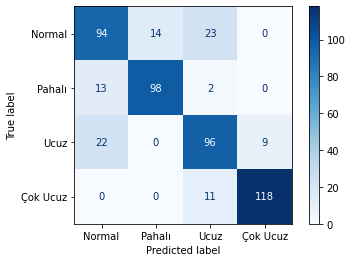

In [109]:
disp = plot_confusion_matrix(nb_model, X_test, y_test, cmap='Blues', values_format='d')

<h2 style="color:#00BFFF"> Decision Tree (Karar Ağacı) Algoritması </h2>

Özniteliklerden oluşan bir ağaç yapısı ile hedef özniteliğimizi sınıflandırmayı sağlayan bir algoritmadır.

In [110]:
cart = DecisionTreeClassifier(criterion='gini')
cart_model = cart.fit(X_train, y_train)

In [111]:
cart_model

DecisionTreeClassifier()

Daha öncesinde train_test_split oluşturduğum için tekrardan oluşturmayacağız ve eğitim verilerimiz ile modelimizi eğitiyoruz. cart_model şeklinde modelimizin adını yazdığımızda modelin aldığı parametreleri görebiliyoruz criterion='gini' olarak default olarak ayarlı olduğunu görüyoruz. Önce bu modelimizi 'gini' ile inceleyip sonra bizden istenen 'entropy' şeklinde tekrardan model oluşturup aradaki farkları inceleyeceğiz.

In [112]:
y_pred = cart_model.predict(X_test)

In [113]:
accuracy_score(y_test, y_pred)

0.82

In [114]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[ 96  24  11   0]
 [ 17  96   0   0]
 [ 11   1 101  14]
 [  0   0  12 117]]


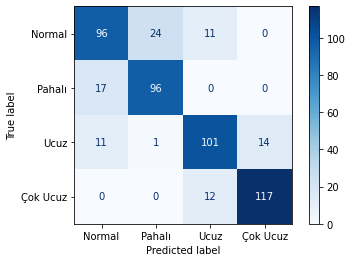

In [115]:
disp = plot_confusion_matrix(cart_model, X_test, y_test, cmap='Blues', values_format='d')

In [116]:
cross_val_score(cart_model, X_test, y_test, cv = 10)

array([0.72, 0.76, 0.72, 0.84, 0.76, 0.82, 0.9 , 0.82, 0.7 , 0.78])

In [117]:
cross_val_score(cart_model, X_test, y_test, cv = 10).mean()

0.804

In [118]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Normal       0.77      0.73      0.75       131
      Pahalı       0.79      0.85      0.82       113
        Ucuz       0.81      0.80      0.80       127
    Çok Ucuz       0.89      0.91      0.90       129

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



Yorum: modelimiz 0.828 accuracy skorunu aldı, cross validation olarakta 0.79 skorunu aldı.Aynı zamanda fiyat bakımından incelediğimizde çok ucuz kategorisinin tahmin sonucu yüksek bir oran yakalmşıken  normal kategorisi diğer sınıflara oranlara daha kötü sonuçlar vermiş.



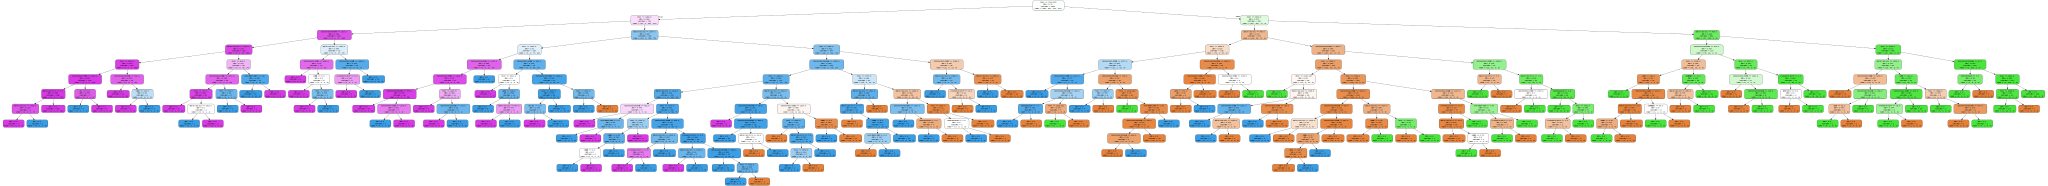

In [119]:
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
graph = Source(tree.export_graphviz(cart, out_file = None, feature_names = X.columns, filled = True, rounded = True))
display(SVG(graph.pipe(format = 'svg')))

Yorum : Ağacımızı bu şekilde görselleştirdiğimizde ağacın RAM özelliğinden dallandığını görmekteyiz yani model tarafından seçilen en iyi özellik RAM'dir.

Karar Agacına göre özniteliklerin önem derecesine bakalım

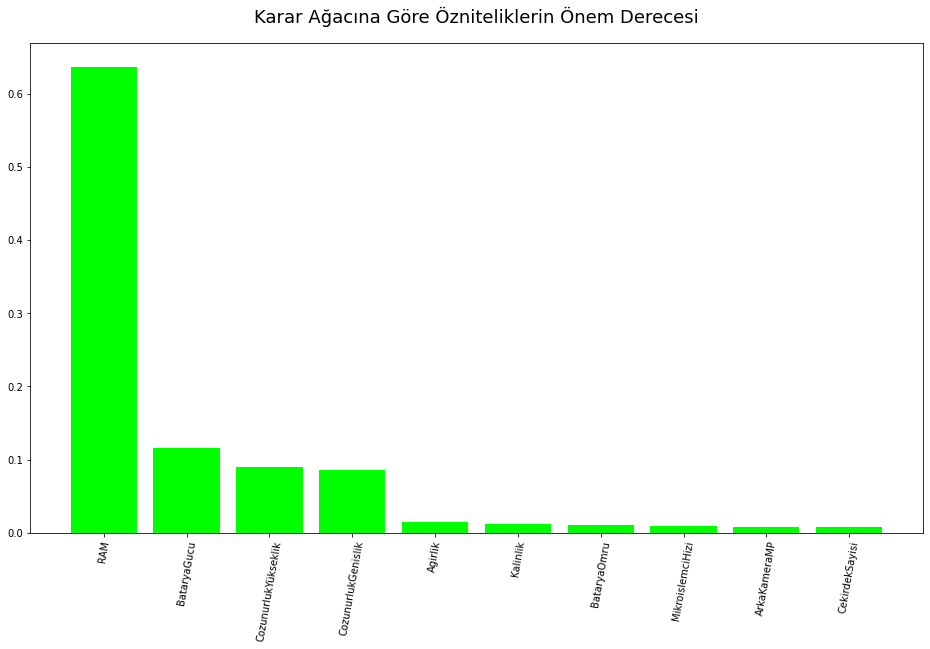

In [120]:
ranking = cart.feature_importances_
features = np.argsort(ranking)[::-1][:10]
columns = X.columns

plt.figure(figsize = (16, 9))
plt.title("Karar Ağacına Göre Özniteliklerin Önem Derecesi", y = 1.03, size = 18)
plt.bar(range(len(features)), ranking[features], color="lime", align="center")
plt.xticks(range(len(features)), columns[features], rotation=80)
plt.show()

Modelimizi criterion parametresini entropy olarak değiştirelim, modelimizi yeniden eğitip nasıl bir sonuç alacağımıza bakalım.

In [121]:
cart = DecisionTreeClassifier(random_state = 42, criterion='entropy')
cart_model = cart.fit(X_train, y_train)

In [122]:
cart_model #criterion='entropy' olduğunu görüyoruz.

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [123]:
y_pred = cart_model.predict(X_test)

In [124]:
accuracy_score(y_test, y_pred)

0.87

In [125]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[108  10  13   0]
 [ 20  93   0   0]
 [  9   0 111   7]
 [  0   0   6 123]]


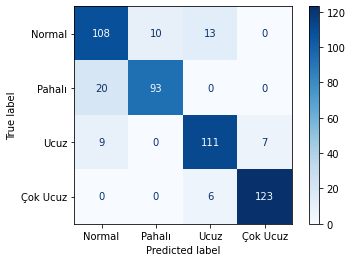

In [126]:
disp = plot_confusion_matrix(cart_model, X_test, y_test, cmap='Blues', values_format='d')

In [127]:
cross_val_score(cart_model, X_test, y_test, cv = 10)

array([0.88, 0.8 , 0.76, 0.8 , 0.74, 0.76, 0.84, 0.8 , 0.8 , 0.78])

In [128]:
cross_val_score(cart_model, X_test, y_test, cv = 10).mean()

0.796

In [129]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      Normal       0.79      0.82      0.81       131
      Pahalı       0.90      0.82      0.86       113
        Ucuz       0.85      0.87      0.86       127
    Çok Ucuz       0.95      0.95      0.95       129

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



Yorum: Yeni modelimizin  daha iyi bir accuracy skoru aldığını gördük Burdan entropy parametresini alarak değiştirmemiz bizim modelimizin tahmin yeteneğini artırmış gözüküyor. 




<h2 style="color:#00BFFF"> KNN Algoritması </h2>

KNN algoritması da bir sınıflandırma algoritmasıdır. Kısaca şöyle çalışır n boyutlu bir düzlemde sınıflandırmak istediğimiz özniteliğimizin belirlediğimiz "k" sayıda en yakın komşusuna bakılarak hangi sınıfa dahil edileceğini bulur.

KNN algoritması en yakın k komşuya göre sınıflandırma yaptığını biliyoruz peki her k değeri bize aynı mı doğrulukta sonuç verir tabiki hayır bazı k değerleri daha iyi model oluşturmamızı sağlar. Bizden de 2den başlayıp 15'e kadar olan k değerlerini incelememiz istenmiş önce model nasıl kuruluyor ona bakalım

KNN modelini kuralım ve eğitelim.

In [130]:
knn = KNeighborsClassifier()
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier()

In [131]:
y_pred = knn_model.predict(X_test)

In [132]:
accuracy_score(y_test, y_pred)

0.924

In [133]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[118   6   7   0]
 [  9 103   1   0]
 [  4   0 115   8]
 [  0   0   3 126]]


In [134]:
cross_val_score(knn_model, X_test, y_test, cv = 10)

array([0.88, 0.88, 0.8 , 0.84, 0.94, 0.92, 0.94, 0.92, 0.8 , 0.84])

In [135]:
cross_val_score(knn_model, X_test, y_test, cv = 10).mean()

0.876

 accuracy değeri = 0.92 ve cross_val değeri = 0.876dir.Bakacagımız aralık referansı az olduğu için k degerini sıra sıra deneyerek karşılaştıracagğz.Bunun içinde bir for döngüsünde score degerlerini her k görüntüledik.Daha kolay karşılaştırabiliriz.


In [136]:
knn = range(2,15)
for k_degeri in knn:
    knn = KNeighborsClassifier(n_neighbors = k_degeri)
    knn_model = knn.fit(X_train, y_train)
    skor = knn_model.score(X_test, y_test)
    print("k=", k_degeri ,"degeri için ->", skor)

k= 2 degeri için -> 0.882
k= 3 degeri için -> 0.906
k= 4 degeri için -> 0.902
k= 5 degeri için -> 0.924
k= 6 degeri için -> 0.918
k= 7 degeri için -> 0.924
k= 8 degeri için -> 0.918
k= 9 degeri için -> 0.928
k= 10 degeri için -> 0.924
k= 11 degeri için -> 0.928
k= 12 degeri için -> 0.928
k= 13 degeri için -> 0.926
k= 14 degeri için -> 0.918


İncelediğimiz zaman scorun en yüksek olduğu k değeri 9 olarak görmekteyiz. Bunu bir grafiğe döküp nasıl gözüktüğünü inceleyelim

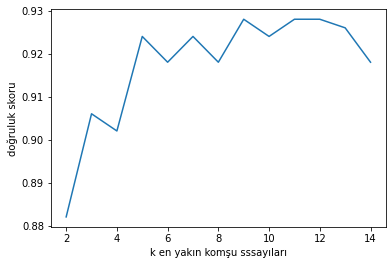

In [137]:
score_list = []

for each in range(2,15):
    knn = KNeighborsClassifier(n_neighbors = each)
    knn.fit(X_train,y_train)
    score_list.append(knn.score(X_test, y_test))
    
plt.plot(range(2,15),score_list)
plt.xlabel("k en yakın komşu sssayıları")
plt.ylabel("doğruluk skoru")
plt.show()

Yorum: knn en yüksek skora sahip olan k=9 değerini de tablo yardımı ile baktığımızda en yüksek değer olduğunu görmekteyiz. O zaman k=9 değeri ile modelimizi tekrardan oluşturalım ve default olan ilk modelle kıyaslayalım.

In [138]:
knn = KNeighborsClassifier(n_neighbors = 9)
knn_tuned = knn.fit(X_train, y_train)

In [139]:
y_pred = knn_tuned.predict(X_test)

In [140]:
accuracy_score(y_test, y_pred)

0.928

In [141]:
cross_val_score(knn_model, X_test, y_test, cv = 10)

array([0.88, 0.94, 0.86, 0.86, 0.96, 0.9 , 0.92, 0.92, 0.84, 0.9 ])

In [142]:
cross_val_score(knn_model, X_test, y_test, cv = 10).mean()

0.898

In [143]:
karmasiklik_matrisi = confusion_matrix(y_test, y_pred)
print(karmasiklik_matrisi)

[[115   8   8   0]
 [  4 108   1   0]
 [  4   0 116   7]
 [  0   0   4 125]]


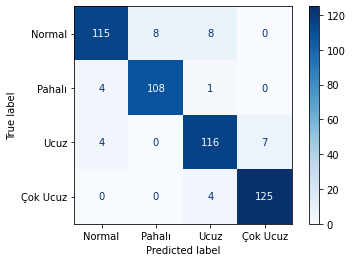

In [144]:
disp = plot_confusion_matrix(knn_tuned, X_test, y_test, cmap='Blues', values_format='d')

Modellerin Doğruluk Skorları karşılaştırdığımızda

GaussianNB = 0.75

DecisionTree = 0.87

KNN = 0.92

En iyi sonuç veren algoritmanın KNN olduğunu gördük. 

Neler yaptık ? 
Bu şekilde tablet ücretlendirme problemine bir çözüm bulmuş olduk.
İlk önce verimizi inceleyip keşifçi veri analizimizi gerçekleştirdik
sonra verimizdeki boş ve gereksiz verilerimiz düzelttik. 
Naive Bayes, Desicion Tree ve KNN algoritmalarını kullanarak
makine öğrenme modelimizi oluşturduk.

